Dataset Link : https://catalog.data.gov/dataset/provisional-weekly-deaths-by-region-race-age-997d6

# Preprocessing the Data:
- Convert the date columns to datetime format.
- Remove rows with missing values or unknown values in relevant columns.

# Feature Engineering:
- Calculate the mortality rate for each demographic group by dividing the number of COVID-19 deaths by the total number of deaths.

# Splitting the Data:
- Split the dataset into features (X) and target variables (Y).
- Identify the demographic groups we want to analyze (e.g., race, age, region).
- Separate the features related to demographic information from other features.

# Grouping by Demographic Variables:
- Group the dataset by each demographic variable (e.g., race, age, region).
- Calculate the total number of COVID-19 deaths and total deaths for each group.
-  Calculate the mortality rate and fairness metric for each group.

# Analyzing Fairness:
- Define a fairness metric (e.g., ratio of mortality rates between different demographic groups).
- Compare mortality rates and fairness metrics across different demographic groups.





## Metrics
# Statistical Parity (Demographic Parity):

Explanation: This metric looks at whether different groups receive the same proportion of favorable outcomes.

Example: In a loan approval scenario, statistical parity would mean that the proportion of approved loans is the same for all racial groups. For instance, if 30% of loan applications from both White and Black applicants are approved, then the system exhibits statistical parity.

# Disparate Impact (Adverse Impact Ratio):

Explanation: Disparate impact measures the ratio of positive outcomes between protected and reference groups.

Example: If the approval rate for White applicants is 50% and for Black applicants is 25%, the disparate impact ratio would be 0.5 / 0.25 = 2. A value close to 1 indicates fairness, whereas values significantly higher or lower suggest potential bias.

# Equalized Odds:

Explanation: Equalized odds ensures that the true positive rate (sensitivity) and false positive rate (1-specificity) are similar across different groups.

Example: In a predictive model for loan defaults, equalized odds would require that the true positive rate (correctly predicting loan defaults) and false positive rate (incorrectly predicting loan defaults) are similar for both men and women.


# Predictive Parity:

Explanation: Similar to equalized odds, but focuses on the positive predictive value (precision) and negative predictive value being equal across groups.


Example: Predictive parity ensures that if the model predicts a loan default, the chances of it being correct should be similar for different racial groups.

# Conditional Demographic Disparity:

Explanation: This metric compares outcome rates across groups while controlling for another attribute.

Example: If we compare loan approval rates across racial groups while controlling for income level, we might find that the approval rates are similar for low-income applicants but differ significantly for high-income applicants.

# Treatment Equality:

Explanation: Treatment equality ensures that similar individuals receive similar outcomes regardless of their sensitive attribute.

Example: In a job application scenario, treatment equality would mean that equally qualified candidates receive job offers at similar rates irrespective of their gender or ethnicity.

# Fairness Through Awareness:

Explanation: This approach involves adjusting the model training process to penalize disparities in predictions based on sensitive attributes.

Example: A fairness-aware algorithm might assign higher penalties for misclassifications on minority groups during training, encouraging the model to make fairer predictions.


# Import Libraries + Read the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Provisional_COVID-19_Deaths_by_HHS_Region__Race__and_Age.csv')

<ipython-input-299-8ab4677ec3a4>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Provisional_COVID-19_Deaths_by_HHS_Region__Race__and_Age.csv')


In [ ]:
df

,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Footnote
0,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,0-4 years,0.0,104.0,NaN
1,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,5-17 years,0.0,41.0,NaN
2,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,18-29 years,0.0,190.0,NaN
3,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,30-39 years,0.0,237.0,NaN
4,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,40-49 years,0.0,325.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194035,09/27/2023,01/01/2020,09/23/2023,By Total,2020-2023,NaN,NaN,NaN,10,Unknown,40-49 years,NaN,89.0,One or more data cells have counts between 1-9...
194036,09/27/2023,01/01/2020,09/23/2023,By Total,2020-2023,NaN,NaN,NaN,10,Unknown,50-64 years,19.0,457.0,NaN
194037,09/27/2023,01/01/2020,09/23/2023,By Total,2020-2023,NaN,NaN,NaN,10,Unknown,65-74 years,15.0,446.0,NaN
194038,09/27/2023,01/01/2020,09/23/2023,By Total,2020-2023,NaN,NaN,NaN,10,Unknown,75-84 years,17.0,243.0,NaN


# Checking for Missing Values

In [ ]:
# Check for missing values
print("Missing values:")
df.isnull().sum()


Missing values:


Data As Of                             0
Start Date                             0
End Date                               0
Group                                  0
Year                                   0
Month                             158400
MMWR Week                          39600
Week-Ending Date                   39600
HHS Region                             0
Race and Hispanic Origin Group         0
Age Group                              0
COVID-19 Deaths                    41227
Total Deaths                       64442
Footnote                           98450
dtype: int64

In [ ]:
df

,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Footnote
0,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,0-4 years,0.0,104.0,NaN
1,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,5-17 years,0.0,41.0,NaN
2,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,18-29 years,0.0,190.0,NaN
3,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,30-39 years,0.0,237.0,NaN
4,09/27/2023,12/29/2019,01/04/2020,By Week,2019/2020,NaN,1.0,01/04/2020,United States,Hispanic,40-49 years,0.0,325.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194035,09/27/2023,01/01/2020,09/23/2023,By Total,2020-2023,NaN,NaN,NaN,10,Unknown,40-49 years,NaN,89.0,One or more data cells have counts between 1-9...
194036,09/27/2023,01/01/2020,09/23/2023,By Total,2020-2023,NaN,NaN,NaN,10,Unknown,50-64 years,19.0,457.0,NaN
194037,09/27/2023,01/01/2020,09/23/2023,By Total,2020-2023,NaN,NaN,NaN,10,Unknown,65-74 years,15.0,446.0,NaN
194038,09/27/2023,01/01/2020,09/23/2023,By Total,2020-2023,NaN,NaN,NaN,10,Unknown,75-84 years,17.0,243.0,NaN


In [ ]:
# Print unique classes of each feature
for column in df.columns:
    unique_classes = df[column].unique()
    print(f"Unique classes for {column}:", unique_classes)


Unique classes for Data As Of: ['09/27/2023']
Unique classes for Start Date: ['12/29/2019' '01/05/2020' '01/12/2020' '01/19/2020' '01/26/2020'
 '02/02/2020' '02/09/2020' '02/16/2020' '02/23/2020' '03/01/2020'
 '03/08/2020' '03/15/2020' '03/22/2020' '03/29/2020' '04/05/2020'
 '04/12/2020' '04/19/2020' '04/26/2020' '05/03/2020' '05/10/2020'
 '05/17/2020' '05/24/2020' '05/31/2020' '06/07/2020' '06/14/2020'
 '06/21/2020' '06/28/2020' '07/05/2020' '07/12/2020' '07/19/2020'
 '07/26/2020' '08/02/2020' '08/09/2020' '08/16/2020' '08/23/2020'
 '08/30/2020' '09/06/2020' '09/13/2020' '09/20/2020' '09/27/2020'
 '10/04/2020' '10/11/2020' '10/18/2020' '10/25/2020' '11/01/2020'
 '11/08/2020' '11/15/2020' '11/22/2020' '11/29/2020' '12/06/2020'
 '12/13/2020' '12/20/2020' '12/27/2020' '01/03/2021' '01/10/2021'
 '01/17/2021' '01/24/2021' '01/31/2021' '02/07/2021' '02/14/2021'
 '02/21/2021' '02/28/2021' '03/07/2021' '03/14/2021' '03/21/2021'
 '03/28/2021' '04/04/2021' '04/11/2021' '04/18/2021' '04/25/2021'

In [ ]:
df

,Group,Year,Month,MMWR Week,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Footnote
0,By Week,2019/2020,1.0,1.0,United States,Hispanic,0-4 years,0.0,104.0,NaN
1,By Week,2019/2020,1.0,1.0,United States,Hispanic,5-17 years,0.0,41.0,NaN
2,By Week,2019/2020,1.0,1.0,United States,Hispanic,18-29 years,0.0,190.0,NaN
3,By Week,2019/2020,1.0,1.0,United States,Hispanic,30-39 years,0.0,237.0,NaN
4,By Week,2019/2020,1.0,1.0,United States,Hispanic,40-49 years,0.0,325.0,NaN
...,...,...,...,...,...,...,...,...,...,...
194035,By Total,2020-2023,NaN,NaN,10,Unknown,40-49 years,NaN,89.0,One or more data cells have counts between 1-9...
194036,By Total,2020-2023,NaN,NaN,10,Unknown,50-64 years,19.0,457.0,NaN
194037,By Total,2020-2023,NaN,NaN,10,Unknown,65-74 years,15.0,446.0,NaN
194038,By Total,2020-2023,NaN,NaN,10,Unknown,75-84 years,17.0,243.0,NaN


In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# Convert 'Start Date' and 'End Date' columns to datetime objects
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

# Extract the month from start date and end date
df['Start Month'] = df['Start Date'].dt.month
df['End Month'] = df['End Date'].dt.month

# Drop specified columns
columns_to_drop = ['Data As Of', 'Start Date', 'End Date', 'Week-Ending Date']
df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df

,Group,Year,Month,MMWR Week,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Footnote,Start Month,End Month
0,By Week,2019/2020,NaN,1.0,United States,Hispanic,0-4 years,0.0,104.0,NaN,12,1
1,By Week,2019/2020,NaN,1.0,United States,Hispanic,5-17 years,0.0,41.0,NaN,12,1
2,By Week,2019/2020,NaN,1.0,United States,Hispanic,18-29 years,0.0,190.0,NaN,12,1
3,By Week,2019/2020,NaN,1.0,United States,Hispanic,30-39 years,0.0,237.0,NaN,12,1
4,By Week,2019/2020,NaN,1.0,United States,Hispanic,40-49 years,0.0,325.0,NaN,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
194035,By Total,2020-2023,NaN,NaN,10,Unknown,40-49 years,NaN,89.0,One or more data cells have counts between 1-9...,1,9
194036,By Total,2020-2023,NaN,NaN,10,Unknown,50-64 years,19.0,457.0,NaN,1,9
194037,By Total,2020-2023,NaN,NaN,10,Unknown,65-74 years,15.0,446.0,NaN,1,9
194038,By Total,2020-2023,NaN,NaN,10,Unknown,75-84 years,17.0,243.0,NaN,1,9


In [ ]:
import pandas as pd

# Assuming df_hhs is your DataFrame containing the HHS data
# Replace 'NaN' with actual NaN values in your DataFrame if they are represented differently

# Drop columns with NaN values
df_hhs_cleaned = df_hhs.dropna(axis=1)

In [ ]:
# Check for missing values
print("Missing values:")
df.isnull().sum()


Missing values:


Group                             0
Year                              0
Month                             0
MMWR Week                         0
HHS Region                        0
Race and Hispanic Origin Group    0
Age Group                         0
COVID-19 Deaths                   0
Total Deaths                      0
dtype: int64

In [ ]:
df

,Group,Year,Month,MMWR Week,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths
0,By Week,2019/2020,0,1,United States,Hispanic,0-4 years,0.0,104.0
1,By Week,2019/2020,0,1,United States,Hispanic,5-17 years,0.0,41.0
2,By Week,2019/2020,0,1,United States,Hispanic,18-29 years,0.0,190.0
3,By Week,2019/2020,0,1,United States,Hispanic,30-39 years,0.0,237.0
4,By Week,2019/2020,0,1,United States,Hispanic,40-49 years,0.0,325.0
...,...,...,...,...,...,...,...,...,...
194033,By Total,2020-2023,0,0,10,Unknown,18-29 years,0.0,14.0
194036,By Total,2020-2023,0,0,10,Unknown,50-64 years,19.0,457.0
194037,By Total,2020-2023,0,0,10,Unknown,65-74 years,15.0,446.0
194038,By Total,2020-2023,0,0,10,Unknown,75-84 years,17.0,243.0


In [ ]:
# Print unique classes of each feature
for column in df_cleaned.columns:
    unique_classes = df_cleaned[column].unique()
    print(f"Unique classes for {column}:", unique_classes)


Unique classes for Group: ['By Week']
Unique classes for Year: ['2019/2020' '2020' '2020/2021' '2021' '2021/2022' '2022' '2023']
Unique classes for Month: [12  1  2  3  4  5  6  7  8  9 10 11]
Unique classes for MMWR Week: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]
Unique classes for HHS Region: ['United States' '01' '02' '03' '04' 4 5 6 7 8 9 '09' '10']
Unique classes for Race and Hispanic Origin Group: ['Hispanic' 'Non-Hispanic American Indian or Alaska Native'
 'Non-Hispanic Asian' 'Non-Hispanic Black'
 'Non-Hispanic More than one race'
 'Non-Hispanic Native Hawaiian or Other Pacific Islander'
 'Non-Hispanic White']
Unique classes for Age Group: ['0-4 years' '5-17 years' '18-29 years' '30-39 years' '40-49 years'
 '50-64 years' '65-74 years' '75-84 years' '85 years and over']
Unique classes for COVID-19 Deaths: [  0   1   2 ... 864 674 561]
Unique classes for Total 

# **Checking for Missing Values**

In [ ]:
# Check for missing values
print("Missing values:")
df.isnull().sum()


Missing values:


Data As Of                            0
Start Date                            0
End Date                              0
Group                                 0
Year                                  0
Month                                 0
MMWR Week                         39600
Week-Ending Date                  39600
HHS Region                            0
Race and Hispanic Origin Group        0
Age Group                             0
COVID-19 Deaths                   41227
Total Deaths                      64442
Footnote                          98450
dtype: int64

# Drop rows with Missing Values + Drop Footnote Column

In [ ]:
# Drop rows with missing values in specified columns
df.dropna(subset=['MMWR Week', 'COVID-19 Deaths', 'Total Deaths',], inplace=True)

In [ ]:
df

,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Footnote
0,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,0-4 years,0.0,104.0,NaN
1,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,5-17 years,0.0,41.0,NaN
2,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,18-29 years,0.0,190.0,NaN
3,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,30-39 years,0.0,237.0,NaN
4,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,40-49 years,0.0,325.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154435,09/27/2023,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,09/23/2023,10,Unknown,40-49 years,0.0,0.0,NaN
154436,09/27/2023,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,09/23/2023,10,Unknown,50-64 years,0.0,0.0,NaN
154437,09/27/2023,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,09/23/2023,10,Unknown,65-74 years,0.0,0.0,NaN
154438,09/27/2023,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,09/23/2023,10,Unknown,75-84 years,0.0,0.0,NaN


In [ ]:

# Drop the Footnote column
df.drop(columns=['Footnote'], inplace=True)

# Remove entries with 'Unknown' in the 'Race and Hispanic Origin Group' column

In [ ]:
df

,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths
0,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,0-4 years,0.0,104.0
1,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,5-17 years,0.0,41.0
2,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,18-29 years,0.0,190.0
3,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,30-39 years,0.0,237.0
4,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,40-49 years,0.0,325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154435,09/27/2023,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,09/23/2023,10,Unknown,40-49 years,0.0,0.0
154436,09/27/2023,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,09/23/2023,10,Unknown,50-64 years,0.0,0.0
154437,09/27/2023,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,09/23/2023,10,Unknown,65-74 years,0.0,0.0
154438,09/27/2023,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,09/23/2023,10,Unknown,75-84 years,0.0,0.0


## Remove entries with 'unknown' values

In [ ]:
df = df[df['Race and Hispanic Origin Group'] != 'Unknown']

df

,Group,Year,Month,MMWR Week,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths
0,By Week,2019/2020,0,1,United States,Hispanic,0-4 years,0.0,104.0
1,By Week,2019/2020,0,1,United States,Hispanic,5-17 years,0.0,41.0
2,By Week,2019/2020,0,1,United States,Hispanic,18-29 years,0.0,190.0
3,By Week,2019/2020,0,1,United States,Hispanic,30-39 years,0.0,237.0
4,By Week,2019/2020,0,1,United States,Hispanic,40-49 years,0.0,325.0
...,...,...,...,...,...,...,...,...,...
194026,By Total,2020-2023,0,0,10,Non-Hispanic White,40-49 years,730.0,13391.0
194027,By Total,2020-2023,0,0,10,Non-Hispanic White,50-64 years,3639.0,60636.0
194028,By Total,2020-2023,0,0,10,Non-Hispanic White,65-74 years,5446.0,87547.0
194029,By Total,2020-2023,0,0,10,Non-Hispanic White,75-84 years,7061.0,111120.0


In [ ]:
df

,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths
0,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,0-4 years,0.0,104.0
1,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,5-17 years,0.0,41.0
2,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,18-29 years,0.0,190.0
3,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,30-39 years,0.0,237.0
4,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,40-49 years,0.0,325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154414,09/27/2023,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,09/23/2023,10,Non-Hispanic Native Hawaiian or Other Pacific ...,5-17 years,0.0,0.0
154415,09/27/2023,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,09/23/2023,10,Non-Hispanic Native Hawaiian or Other Pacific ...,18-29 years,0.0,0.0
154416,09/27/2023,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,09/23/2023,10,Non-Hispanic Native Hawaiian or Other Pacific ...,30-39 years,0.0,0.0
154420,09/27/2023,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,09/23/2023,10,Non-Hispanic Native Hawaiian or Other Pacific ...,75-84 years,0.0,0.0


In [ ]:
df = df[df['Race and Hispanic Origin Group'] != 'Unknown']

df

,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths
0,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,0-4 years,0.0,104.0
1,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,5-17 years,0.0,41.0
2,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,18-29 years,0.0,190.0
3,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,30-39 years,0.0,237.0
4,09/27/2023,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,01/04/2020,United States,Hispanic,40-49 years,0.0,325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154414,09/27/2023,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,09/23/2023,10,Non-Hispanic Native Hawaiian or Other Pacific ...,5-17 years,0.0,0.0
154415,09/27/2023,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,09/23/2023,10,Non-Hispanic Native Hawaiian or Other Pacific ...,18-29 years,0.0,0.0
154416,09/27/2023,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,09/23/2023,10,Non-Hispanic Native Hawaiian or Other Pacific ...,30-39 years,0.0,0.0
154420,09/27/2023,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,09/23/2023,10,Non-Hispanic Native Hawaiian or Other Pacific ...,75-84 years,0.0,0.0


In [ ]:
# Print unique classes of each feature
for column in df_cleaned.columns:
    unique_classes = df_cleaned[column].unique()
    print(f"Unique classes for {column}:", unique_classes)


Unique classes for Group: ['By Week']
Unique classes for Year: ['2019/2020' '2020' '2020/2021' '2021' '2021/2022' '2022' '2023']
Unique classes for Month: [12  1  2  3  4  5  6  7  8  9 10 11]
Unique classes for MMWR Week: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]
Unique classes for HHS Region: ['United States' '01' '02' '03' '04' 4 5 6 7 8 9 '09' '10']
Unique classes for Race and Hispanic Origin Group: ['Hispanic' 'Non-Hispanic American Indian or Alaska Native'
 'Non-Hispanic Asian' 'Non-Hispanic Black'
 'Non-Hispanic More than one race'
 'Non-Hispanic Native Hawaiian or Other Pacific Islander'
 'Non-Hispanic White']
Unique classes for Age Group: ['0-4 years' '5-17 years' '18-29 years' '30-39 years' '40-49 years'
 '50-64 years' '65-74 years' '75-84 years' '85 years and over']
Unique classes for COVID-19 Deaths: [  0   1   2 ... 864 674 561]
Unique classes for Total 

In [ ]:
# Feature Engineering
df['Mortality Rate'] = df['COVID-19 Deaths'] / df['Total Deaths']

In [ ]:
df

,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Mortality Rate
0,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,2020-01-04,United States,Hispanic,0-4 years,0.0,104.0,0.0
1,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,2020-01-04,United States,Hispanic,5-17 years,0.0,41.0,0.0
2,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,2020-01-04,United States,Hispanic,18-29 years,0.0,190.0,0.0
3,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,2020-01-04,United States,Hispanic,30-39 years,0.0,237.0,0.0
4,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,12.0,1.0,2020-01-04,United States,Hispanic,40-49 years,0.0,325.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154414,2023-09-27,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,2023-09-23,10,Non-Hispanic Native Hawaiian or Other Pacific ...,5-17 years,0.0,0.0,NaN
154415,2023-09-27,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,2023-09-23,10,Non-Hispanic Native Hawaiian or Other Pacific ...,18-29 years,0.0,0.0,NaN
154416,2023-09-27,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,2023-09-23,10,Non-Hispanic Native Hawaiian or Other Pacific ...,30-39 years,0.0,0.0,NaN
154420,2023-09-27,2023-09-17,2023-09-23,By Week,2023,9.0,38.0,2023-09-23,10,Non-Hispanic Native Hawaiian or Other Pacific ...,75-84 years,0.0,0.0,NaN


In [ ]:
# Assuming your DataFrame is named df
df.dropna(subset=['Mortality Rate'], inplace=True)

Columns to Drop:

- Data As Of: This column likely indicates the date when the data was last updated, which may not be relevant for fairness analysis.
- Start Date and End Date: These columns represent the start and end dates of the data collection period, which may not directly contribute to fairness analysis.
- Week-Ending Date: Similar to Start Date and End Date, this column may not be directly relevant to fairness analysis unless you're examining weekly trends.

Columns to Keep:

- HHS Region: This column provides information about the region, which could be relevant for assessing disparities in COVID-19 mortality rates across different geographic areas.
- Group: It's not clear what this column represents based on the information provided, but if it's not directly related to race, ethnicity, or mortality rates, it could be dropped.
- Year and MMWR Week: These columns seem to represent temporal information that may not be essential for fairness analysis unless you're specifically examining temporal trends.
- Race and Hispanic Origin Group: This column is crucial for analyzing disparities based on race and ethnicity, which is directly related to fairness analysis.
- Age Group: Age is an essential demographic variable that could influence COVID-19 mortality rates and should be retained.
- COVID-19 Deaths: This column represents the number of COVID-19 deaths, which is a key variable for assessing mortality rates and disparities.
- Total Deaths: This column provides information about total deaths, which is necessary for calculating mortality rates and comparing them with COVID-19 deaths

In [ ]:
# Define the list of columns to drop
columns_to_drop = ['Data As Of', 'Start Date', 'End Date','Week-Ending Date']

# Remove decimal from the 'Month' column
df['Month'] = df['Month'].astype(int)


# Remove decimal from the 'Month' column
df['MMWR Week'] = df['MMWR Week'].astype(int)

# Convert 'COVID-19 Deaths' and 'Total Deaths' columns to integers
df['COVID-19 Deaths'] = df['COVID-19 Deaths'].astype(int)
df['Total Deaths'] = df['Total Deaths'].astype(int)


# Drop the unnecessary columns
df_cleaned = df.drop(columns=columns_to_drop)

# Filter out rows with non-blank entries in the 'Race and Hispanic Origin Group' column
df_cleaned = df_cleaned[df_cleaned['Race and Hispanic Origin Group'].notnull()]

# Reset index after filtering
df_cleaned.reset_index(drop=True, inplace=True)

# Display the DataFrame after removing blank entries
df_cleaned

,Group,Year,Month,MMWR Week,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Mortality Rate
0,By Week,2019/2020,12,1,United States,Hispanic,0-4 years,0,104,0.000000
1,By Week,2019/2020,12,1,United States,Hispanic,5-17 years,0,41,0.000000
2,By Week,2019/2020,12,1,United States,Hispanic,18-29 years,0,190,0.000000
3,By Week,2019/2020,12,1,United States,Hispanic,30-39 years,0,237,0.000000
4,By Week,2019/2020,12,1,United States,Hispanic,40-49 years,0,325,0.000000
...,...,...,...,...,...,...,...,...,...,...
42866,By Week,2023,9,37,10,Non-Hispanic Asian,85 years and over,0,17,0.000000
42867,By Week,2023,9,37,10,Non-Hispanic White,18-29 years,0,12,0.000000
42868,By Week,2023,9,37,10,Non-Hispanic White,30-39 years,0,26,0.000000
42869,By Week,2023,9,37,10,Non-Hispanic White,40-49 years,0,36,0.000000


In [ ]:
# Print unique classes of each feature
for column in df_cleaned.columns:
    unique_classes = df_cleaned[column].unique()
    print(f"Unique classes for {column}:", unique_classes)


Unique classes for Group: ['By Week']
Unique classes for Year: ['2019/2020' '2020' '2020/2021' '2021' '2021/2022' '2022' '2023']
Unique classes for Month: [12  1  2  3  4  5  6  7  8  9 10 11]
Unique classes for MMWR Week: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53]
Unique classes for HHS Region: ['United States' '01' '02' '03' '04' 4 5 6 7 8 9 '09' '10']
Unique classes for Race and Hispanic Origin Group: ['Hispanic' 'Non-Hispanic American Indian or Alaska Native'
 'Non-Hispanic Asian' 'Non-Hispanic Black'
 'Non-Hispanic More than one race'
 'Non-Hispanic Native Hawaiian or Other Pacific Islander'
 'Non-Hispanic White']
Unique classes for Age Group: ['0-4 years' '5-17 years' '18-29 years' '30-39 years' '40-49 years'
 '50-64 years' '65-74 years' '75-84 years' '85 years and over']
Unique classes for COVID-19 Deaths: [  0   1   2 ... 864 674 561]
Unique classes for Total 

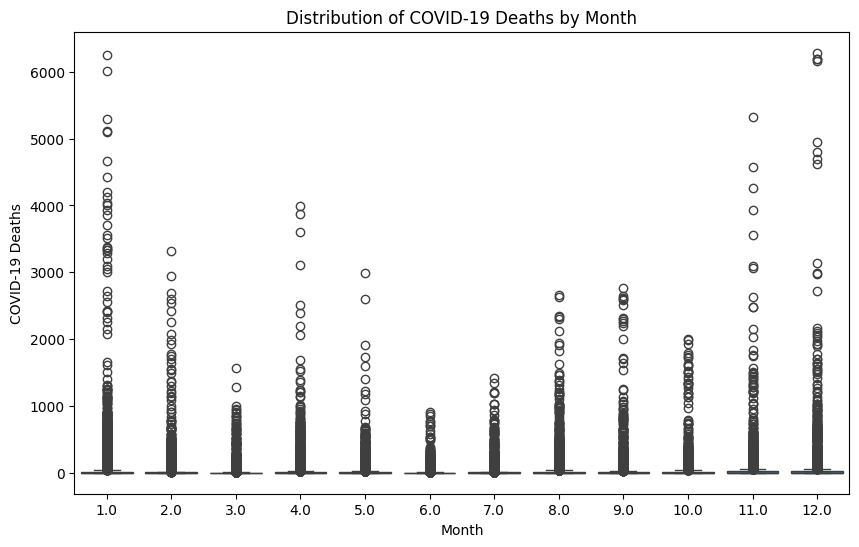

In [ ]:
# Visualize distribution of COVID-19 deaths and total deaths by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='COVID-19 Deaths', data=df)
plt.title('Distribution of COVID-19 Deaths by Month')
plt.xlabel('Month')
plt.ylabel('COVID-19 Deaths')
plt.show()


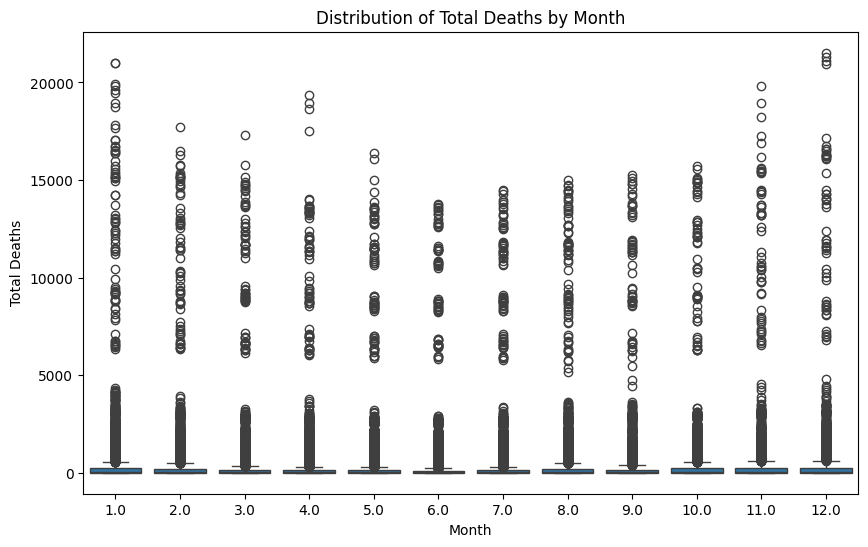

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Total Deaths', data=df)
plt.title('Distribution of Total Deaths by Month')
plt.xlabel('Month')
plt.ylabel('Total Deaths')
plt.show()

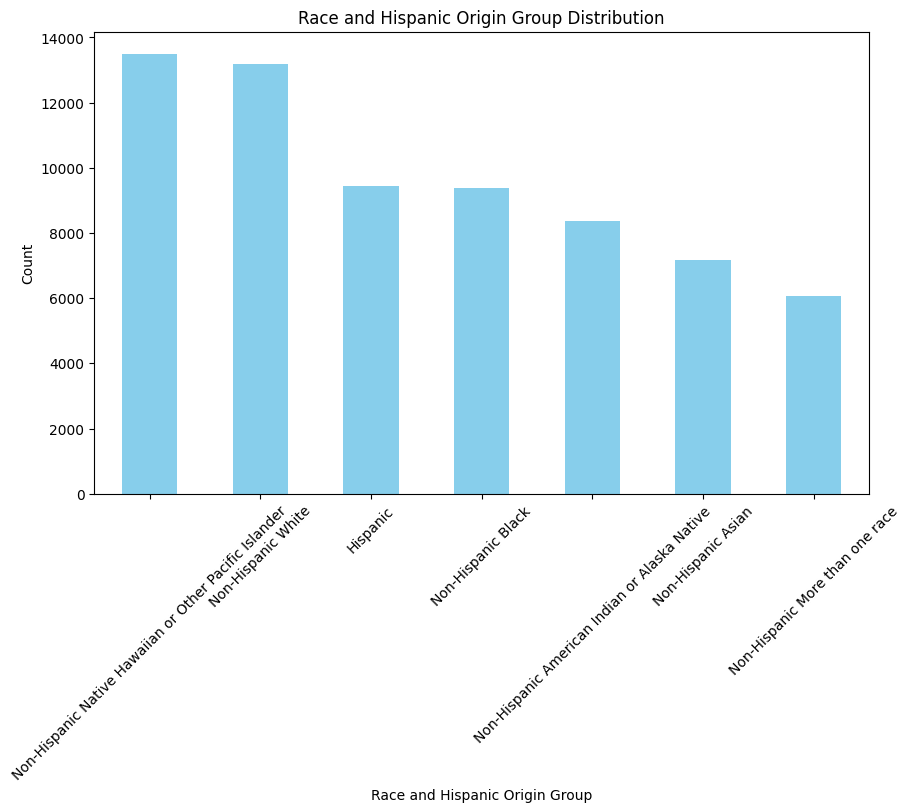

Non-Hispanic Native Hawaiian or Other Pacific Islander    13502
Non-Hispanic White                                        13183
Hispanic                                                   9431
Non-Hispanic Black                                         9372
Non-Hispanic American Indian or Alaska Native              8359
Non-Hispanic Asian                                         7179
Non-Hispanic More than one race                            6069
Name: Race and Hispanic Origin Group, dtype: int64


In [ ]:
race_counts = df['Race and Hispanic Origin Group'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar', color='skyblue')
plt.title('Race and Hispanic Origin Group Distribution')
plt.xlabel('Race and Hispanic Origin Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

print(race_counts)


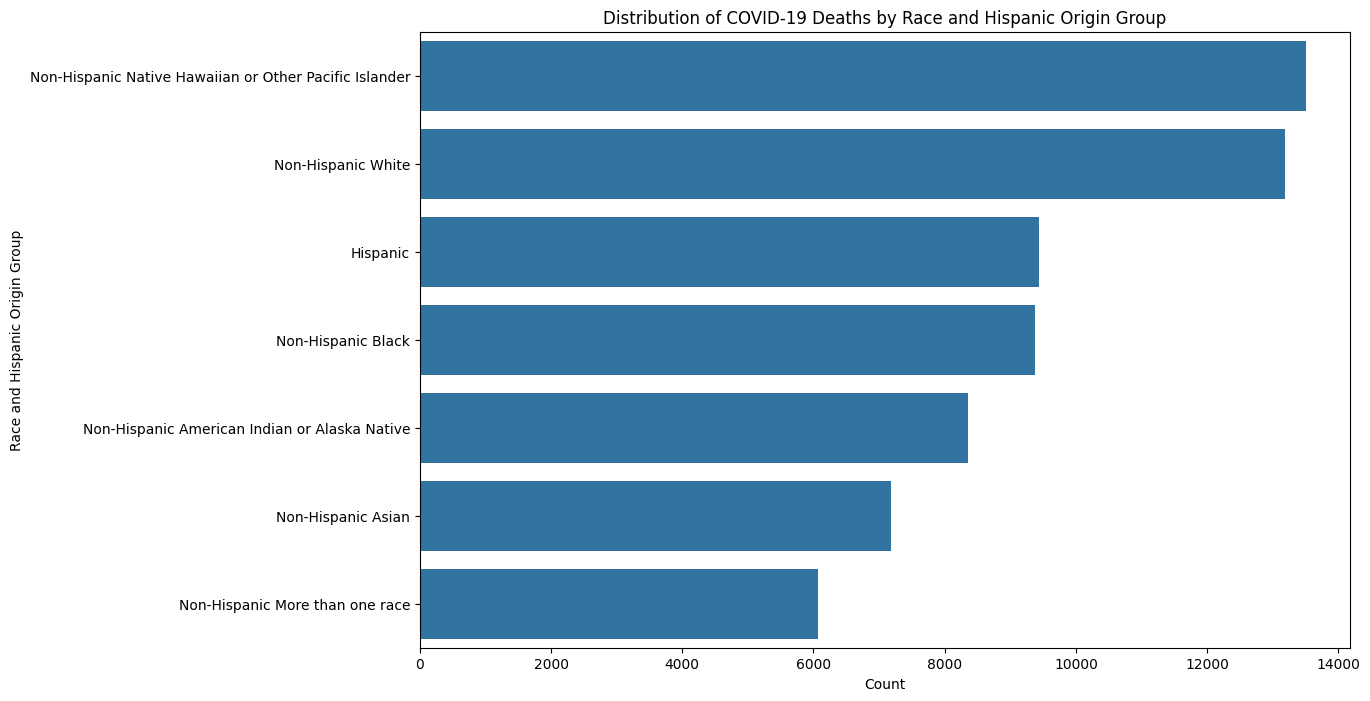

In [ ]:
#Distribution of COVID-19 Deaths by Race and Hispanic Origin Group
plt.figure(figsize=(12, 8))
sns.countplot(y='Race and Hispanic Origin Group', data=df, order=df['Race and Hispanic Origin Group'].value_counts().index)
plt.title('Distribution of COVID-19 Deaths by Race and Hispanic Origin Group')
plt.xlabel('Count')
plt.ylabel('Race and Hispanic Origin Group')
plt.show()

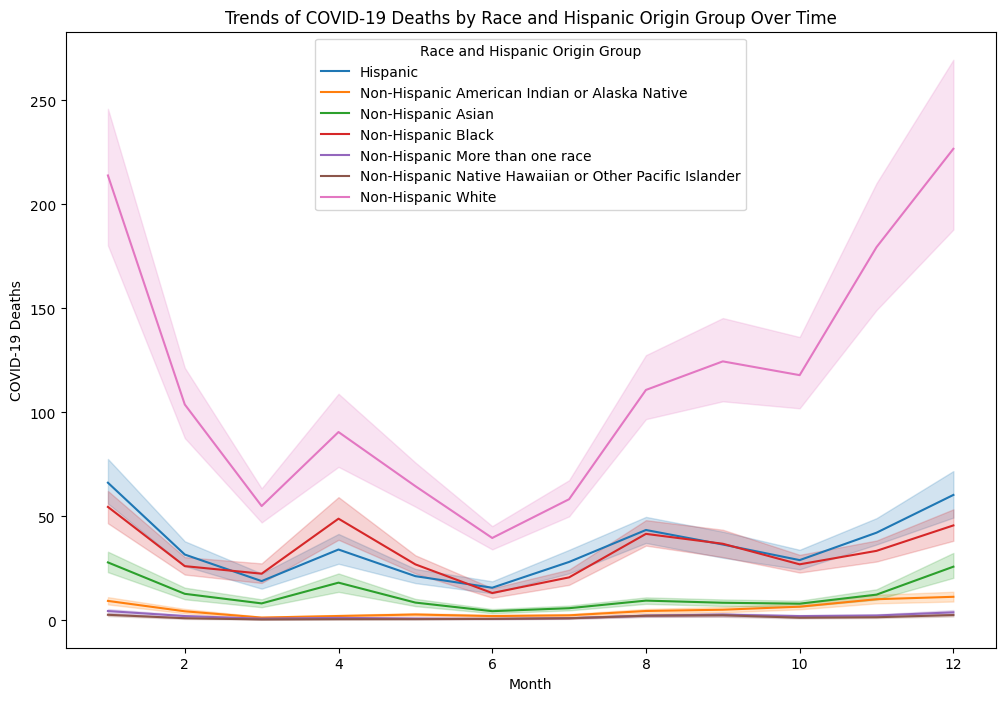

In [ ]:
# Trends Over Time
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='COVID-19 Deaths', hue='Race and Hispanic Origin Group', data=df_cleaned)
plt.title('Trends of COVID-19 Deaths by Race and Hispanic Origin Group Over Time')
plt.xlabel('Month')
plt.ylabel('COVID-19 Deaths')
plt.legend(title='Race and Hispanic Origin Group')
plt.show()


<ipython-input-21-8afe5493a5b2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby('Race and Hispanic Origin Group').sum()


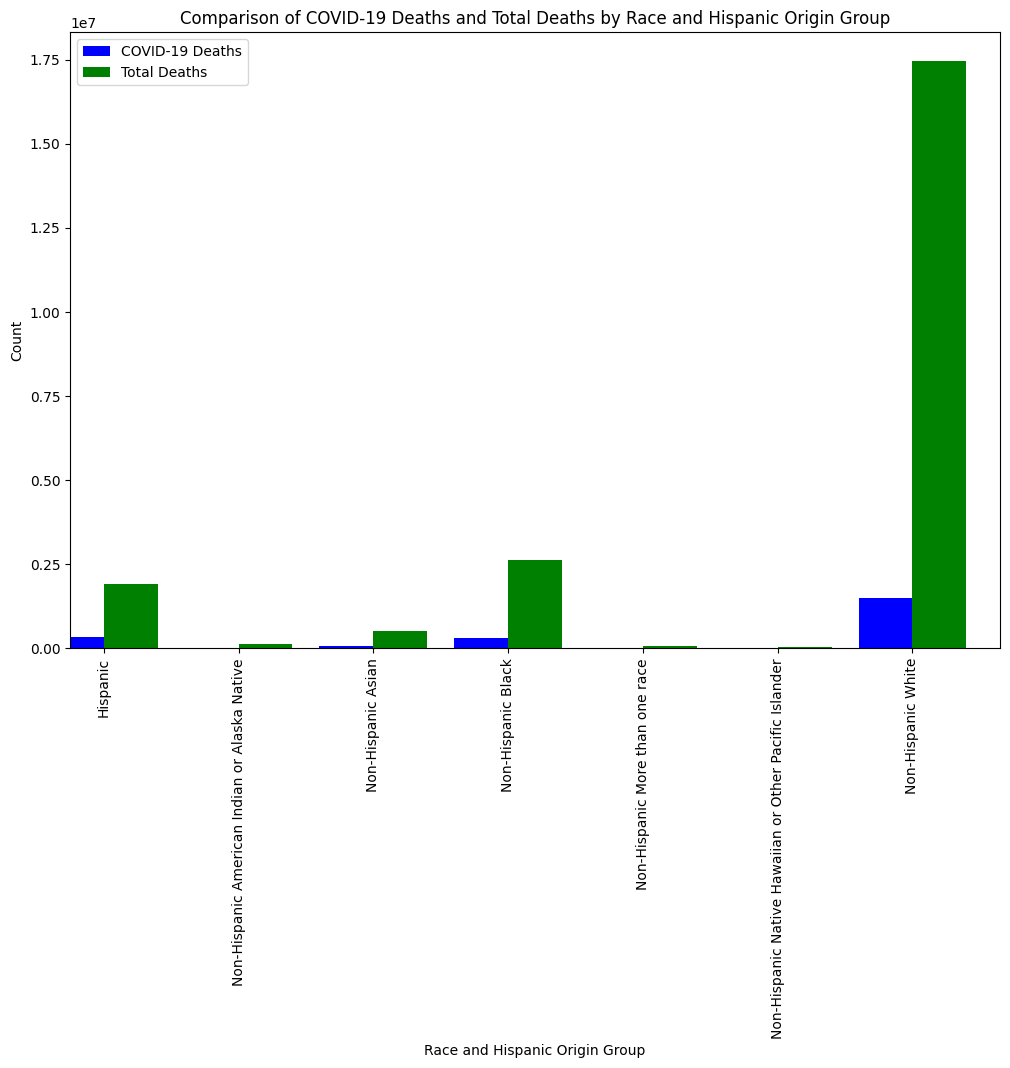

In [ ]:
# Comparison with Total Deaths
df_grouped = df.groupby('Race and Hispanic Origin Group').sum()
plt.figure(figsize=(12, 8))
df_grouped['COVID-19 Deaths'].plot(kind='bar', color='blue', width=0.4, position=1, label='COVID-19 Deaths')
df_grouped['Total Deaths'].plot(kind='bar', color='green', width=0.4, position=0, label='Total Deaths')
plt.title('Comparison of COVID-19 Deaths and Total Deaths by Race and Hispanic Origin Group')
plt.xlabel('Race and Hispanic Origin Group')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
# Assuming your DataFrame is named df
df.dropna(subset=['Mortality Rate'], inplace=True)


In [ ]:
df

,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Mortality Rate
0,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,12,1.0,2020-01-04,United States,Hispanic,0-4 years,0,104,0.000000
1,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,12,1.0,2020-01-04,United States,Hispanic,5-17 years,0,41,0.000000
2,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,12,1.0,2020-01-04,United States,Hispanic,18-29 years,0,190,0.000000
3,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,12,1.0,2020-01-04,United States,Hispanic,30-39 years,0,237,0.000000
4,2023-09-27,2019-12-29,2020-01-04,By Week,2019/2020,12,1.0,2020-01-04,United States,Hispanic,40-49 years,0,325,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154322,2023-09-27,2023-09-10,2023-09-16,By Week,2023,9,37.0,2023-09-16,10,Non-Hispanic Asian,85 years and over,0,17,0.000000
154352,2023-09-27,2023-09-10,2023-09-16,By Week,2023,9,37.0,2023-09-16,10,Non-Hispanic White,18-29 years,0,12,0.000000
154353,2023-09-27,2023-09-10,2023-09-16,By Week,2023,9,37.0,2023-09-16,10,Non-Hispanic White,30-39 years,0,26,0.000000
154354,2023-09-27,2023-09-10,2023-09-16,By Week,2023,9,37.0,2023-09-16,10,Non-Hispanic White,40-49 years,0,36,0.000000


In [ ]:
# Define the list of columns to drop
columns_to_drop = ['Data As Of', 'Start Date', 'End Date','Week-Ending Date']

# Remove decimal from the 'Month' column
df['Month'] = df['Month'].astype(int)

# Convert 'COVID-19 Deaths' and 'Total Deaths' columns to integers
df['COVID-19 Deaths'] = df['COVID-19 Deaths'].astype(int)
df['Total Deaths'] = df['Total Deaths'].astype(int)


# Drop the unnecessary columns
df_cleaned = df.drop(columns=columns_to_drop)

# Filter out rows with non-blank entries in the 'Race and Hispanic Origin Group' column
df_cleaned = df_cleaned[df_cleaned['Race and Hispanic Origin Group'].notnull()]

# Reset index after filtering
df_cleaned.reset_index(drop=True, inplace=True)

# Display the DataFrame after removing blank entries
df_cleaned



,Group,Year,Month,MMWR Week,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Mortality Rate
0,By Week,2019/2020,12,1.0,United States,Hispanic,0-4 years,0,104,0.000000
1,By Week,2019/2020,12,1.0,United States,Hispanic,5-17 years,0,41,0.000000
2,By Week,2019/2020,12,1.0,United States,Hispanic,18-29 years,0,190,0.000000
3,By Week,2019/2020,12,1.0,United States,Hispanic,30-39 years,0,237,0.000000
4,By Week,2019/2020,12,1.0,United States,Hispanic,40-49 years,0,325,0.000000
...,...,...,...,...,...,...,...,...,...,...
42866,By Week,2023,9,37.0,10,Non-Hispanic Asian,85 years and over,0,17,0.000000
42867,By Week,2023,9,37.0,10,Non-Hispanic White,18-29 years,0,12,0.000000
42868,By Week,2023,9,37.0,10,Non-Hispanic White,30-39 years,0,26,0.000000
42869,By Week,2023,9,37.0,10,Non-Hispanic White,40-49 years,0,36,0.000000


In [ ]:
import numpy as np

# 1. Convert numeric HHS Region values to strings
df_cleaned['HHS Region'] = df_cleaned['HHS Region'].astype(str)

# 2. Convert Age Group ranges to standard format
df_cleaned['Age Group'] = df_cleaned['Age Group'].str.replace(' years', '')  # Remove 'years' suffix
df_cleaned['Age Group'] = df_cleaned['Age Group'].str.replace(' and over', '+')  # Replace 'years and over' with '+'
df_cleaned['Age Group'] = df_cleaned['Age Group'].str.replace('85+', '85')  # Replace '85+' with '85'

# 3. Round Mortality Rate to 4 decimal places
df_cleaned['Mortality Rate'] = np.round(df_cleaned['Mortality Rate'], 4)

# Display the preprocessed DataFrame
df_cleaned.head()


<ipython-input-70-636c00aa1f9f>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df_cleaned['Age Group'] = df_cleaned['Age Group'].str.replace('85+', '85')  # Replace '85+' with '85'


,Month,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Mortality Rate
0,12,United States,Hispanic,0-4,0,104,0.0
1,12,United States,Hispanic,5-17,0,41,0.0
2,12,United States,Hispanic,18-29,0,190,0.0
3,12,United States,Hispanic,30-39,0,237,0.0
4,12,United States,Hispanic,40-49,0,325,0.0


In [ ]:
# Print unique classes of each feature
for column in df_cleaned.columns:
    unique_classes = df_cleaned[column].unique()
    print(f"Unique classes for {column}:", unique_classes)


Unique classes for Month: [12  1  2  3  4  5  6  7  8  9 10 11]
Unique classes for HHS Region: ['United States' '01' '02' '03' '04' '4' '5' '6' '7' '8' '9' '09' '10']
Unique classes for Race and Hispanic Origin Group: ['Hispanic' 'Non-Hispanic American Indian or Alaska Native'
 'Non-Hispanic Asian' 'Non-Hispanic Black'
 'Non-Hispanic More than one race'
 'Non-Hispanic Native Hawaiian or Other Pacific Islander'
 'Non-Hispanic White']
Unique classes for Age Group: ['0-4' '5-17' '18-29' '30-39' '40-49' '50-64' '65-74' '75-84' '85+']
Unique classes for COVID-19 Deaths: [  0   1   2 ... 864 674 561]
Unique classes for Total Deaths: [ 104   41  190 ... 1942 1801 1321]
Unique classes for Mortality Rate: [0.     0.0007 0.0012 ... 0.5143 0.3181 0.697 ]


In [ ]:
# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

# Display the cleaned DataFrame
df_cleaned.head()

,Month,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Mortality Rate
0,12,United States,Hispanic,0-4 years,0,104,0.0
1,12,United States,Hispanic,5-17 years,0,41,0.0
2,12,United States,Hispanic,18-29 years,0,190,0.0
3,12,United States,Hispanic,30-39 years,0,237,0.0
4,12,United States,Hispanic,40-49 years,0,325,0.0


In [ ]:
# Mapping dictionary for HHS Region values
region_mapping = {
    'United States': '00',
    '01': '01',
    '02': '02',
    '03': '03',
    '04': '04',
    '4': '04',
    '5': '05',
    '6': '06',
    '7': '07',
    '8': '08',
    '9': '09',
    '09': '09',
    '10': '10'
}

# Map HHS Region values to corresponding regions
df_cleaned['HHS Region'] = df_cleaned['HHS Region'].map(region_mapping)

# Display unique classes for HHS Region after mapping
print("Unique classes for HHS Region:", df_cleaned['HHS Region'].unique())

Unique classes for HHS Region: ['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10']


In [ ]:
df_cleaned

,Month,HHS Region,Race and Hispanic Origin Group,Age Group,COVID-19 Deaths,Total Deaths,Mortality Rate
0,12,00,Hispanic,0-4,0,104,0.0000
1,12,00,Hispanic,5-17,0,41,0.0000
2,12,00,Hispanic,18-29,0,190,0.0000
3,12,00,Hispanic,30-39,0,237,0.0000
4,12,00,Hispanic,40-49,0,325,0.0000
...,...,...,...,...,...,...,...
42866,9,10,Non-Hispanic Asian,85+,0,17,0.0000
42867,9,10,Non-Hispanic White,18-29,0,12,0.0000
42868,9,10,Non-Hispanic White,30-39,0,26,0.0000
42869,9,10,Non-Hispanic White,40-49,0,36,0.0000


Month (Categorical):

- Visualize the distribution of COVID-19 deaths over the months using a bar plot.
-Calculate and display the total count of COVID-19 deaths for each month.

# Distribution of COVID-19 deaths over different months (Bar Chart)

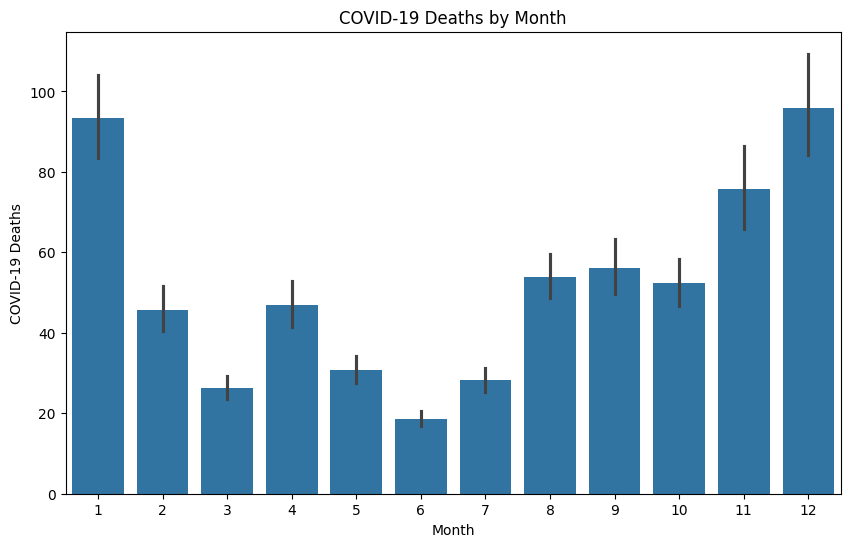

In [ ]:
# Visualize the distribution of COVID-19 deaths over the months
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='COVID-19 Deaths', data=df_cleaned)
plt.title('COVID-19 Deaths by Month')
plt.xlabel('Month')
plt.ylabel('COVID-19 Deaths')
plt.show()


In [ ]:
# Calculate and display the total count of COVID-19 deaths for each month
count_by_month = df_cleaned.groupby('Month')['COVID-19 Deaths'].sum()
print("Total COVID-19 Deaths by Month:")
print(count_by_month)

Total COVID-19 Deaths by Month:
Month
1     441836
2     173608
3      97869
4     175154
5     126109
6      63990
7     110016
8     205433
9     170270
10    152017
11    208864
12    287510
Name: COVID-19 Deaths, dtype: int64


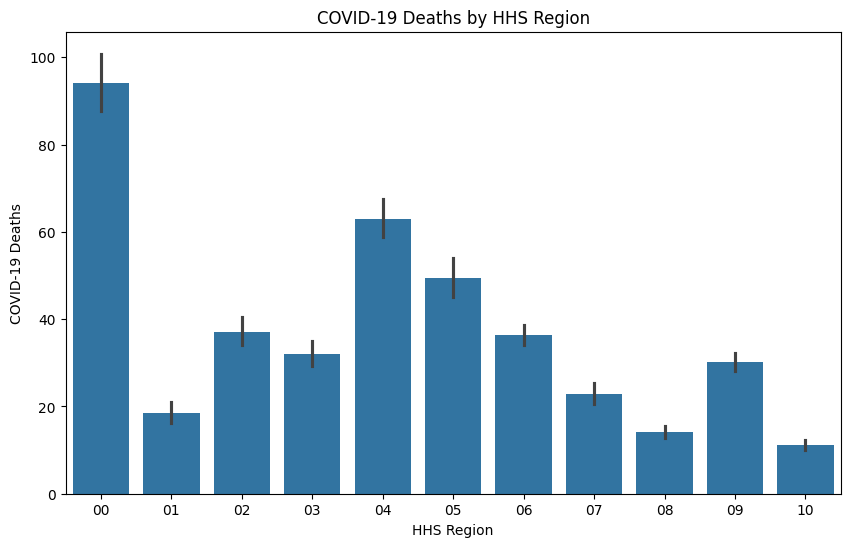

Total COVID-19 Deaths by HHS Region:
HHS Region
00    1143545
01      39583
02     113157
03     100905
04     251827
05     175747
06     151739
07      44160
08      26879
09     140709
10      24425
Name: COVID-19 Deaths, dtype: int64


In [ ]:
# HHS Region (Categorical)
# Visualize the distribution of COVID-19 deaths across different HHS regions using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='HHS Region', y='COVID-19 Deaths', data=df_cleaned)
plt.title('COVID-19 Deaths by HHS Region')
plt.xlabel('HHS Region')
plt.ylabel('COVID-19 Deaths')
plt.show()

# Calculate and display the total count of COVID-19 deaths for each HHS region
count_by_region = df_cleaned.groupby('HHS Region')['COVID-19 Deaths'].sum()
print("Total COVID-19 Deaths by HHS Region:")
print(count_by_region)

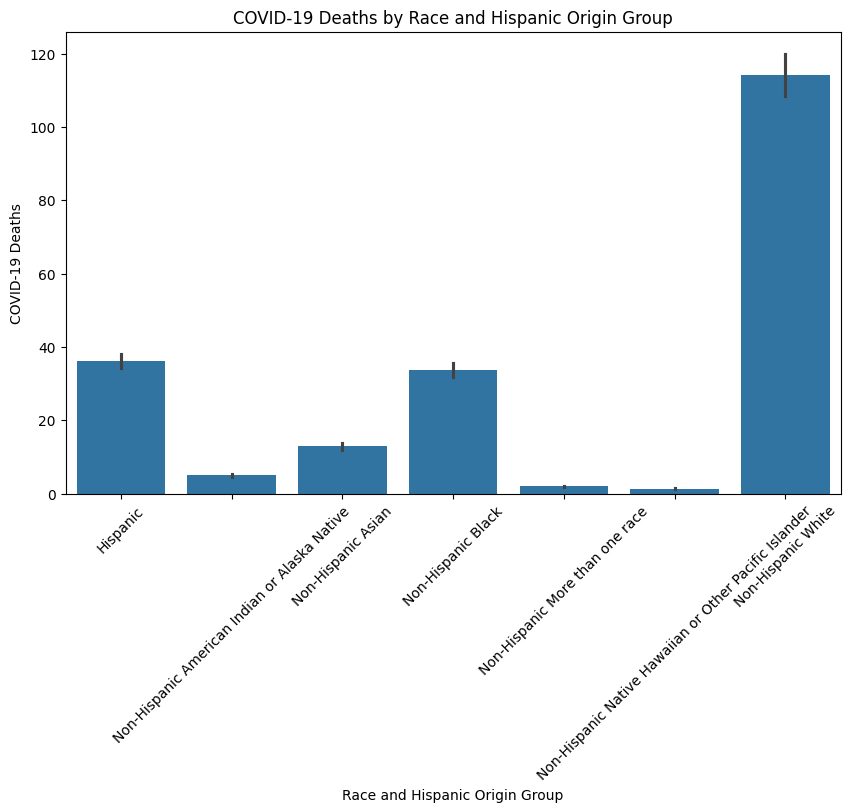

Total COVID-19 Deaths by Race and Hispanic Origin Group:
Race and Hispanic Origin Group
Hispanic                                                   331200
Non-Hispanic American Indian or Alaska Native               15730
Non-Hispanic Asian                                          58398
Non-Hispanic Black                                         295779
Non-Hispanic More than one race                              4629
Non-Hispanic Native Hawaiian or Other Pacific Islander       2485
Non-Hispanic White                                        1504455
Name: COVID-19 Deaths, dtype: int64


In [ ]:
# Race and Hispanic Origin Group (Categorical)
# Visualize the distribution of COVID-19 deaths across different racial and ethnic groups using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Race and Hispanic Origin Group', y='COVID-19 Deaths', data=df_cleaned)
plt.title('COVID-19 Deaths by Race and Hispanic Origin Group')
plt.xlabel('Race and Hispanic Origin Group')
plt.ylabel('COVID-19 Deaths')
plt.xticks(rotation=45)
plt.show()

# Calculate and display the total count of COVID-19 deaths for each racial and ethnic group
count_by_race = df_cleaned.groupby('Race and Hispanic Origin Group')['COVID-19 Deaths'].sum()
print("Total COVID-19 Deaths by Race and Hispanic Origin Group:")
print(count_by_race)

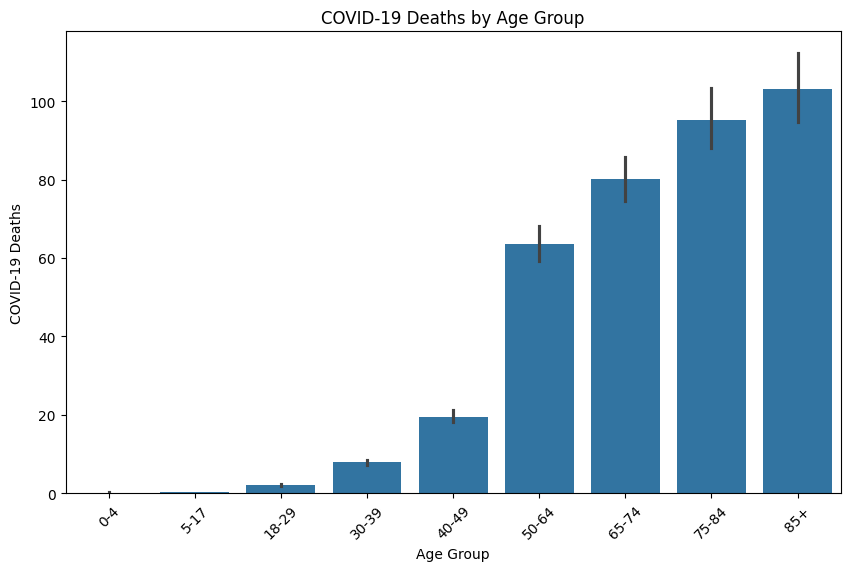

Total COVID-19 Deaths by Age Group:
Age Group
0-4         798
18-29      9006
30-39     30602
40-49     80904
5-17        890
50-64    391147
65-74    499194
75-84    587480
85+      612655
Name: COVID-19 Deaths, dtype: int64


In [ ]:
# Age Group (Categorical)
# Visualize the distribution of COVID-19 deaths across different age groups using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='COVID-19 Deaths', data=df_cleaned)
plt.title('COVID-19 Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Deaths')
plt.xticks(rotation=45)
plt.show()

# Calculate and display the total count of COVID-19 deaths for each age group
count_by_age = df_cleaned.groupby('Age Group')['COVID-19 Deaths'].sum()
print("Total COVID-19 Deaths by Age Group:")
print(count_by_age)

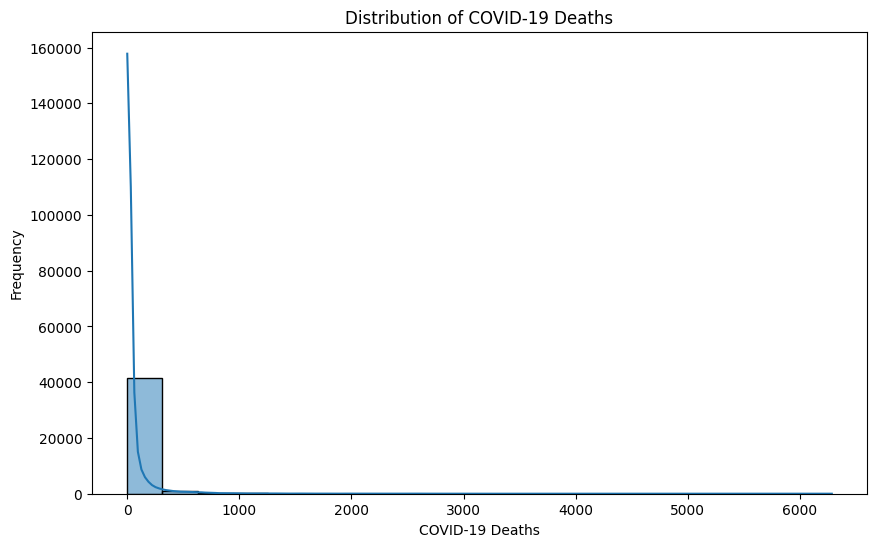

Summary statistics for COVID-19 Deaths:
count    42871.000000
mean        51.612419
std        212.355851
min          0.000000
25%          0.000000
50%          2.000000
75%         28.000000
max       6286.000000
Name: COVID-19 Deaths, dtype: float64


In [ ]:
# COVID-19 Deaths (Numerical)
# Plot the distribution of COVID-19 deaths using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['COVID-19 Deaths'], bins=20, kde=True)
plt.title('Distribution of COVID-19 Deaths')
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Frequency')
plt.show()

# Calculate and display summary statistics for COVID-19 deaths
print("Summary statistics for COVID-19 Deaths:")
print(df_cleaned['COVID-19 Deaths'].describe())

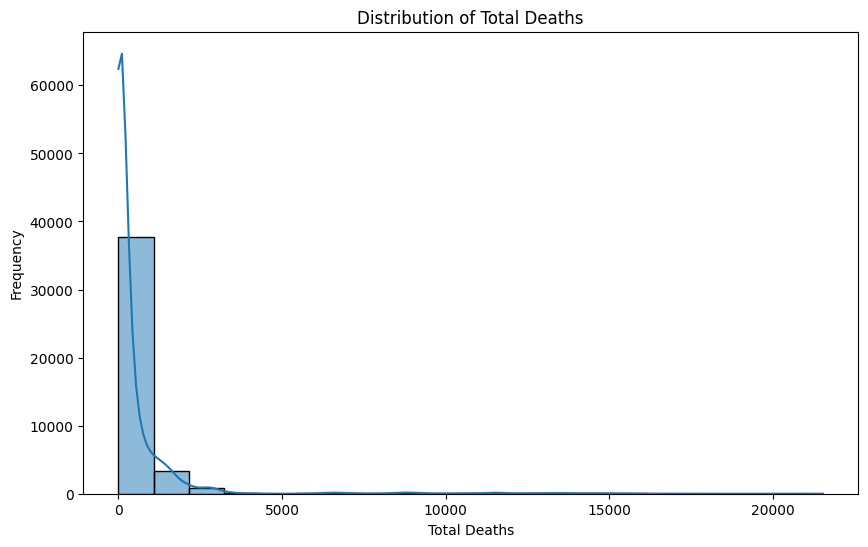

Summary statistics for Total Deaths:
count    42871.000000
mean       529.535350
std       1582.641707
min          1.000000
25%         21.000000
50%         68.000000
75%        409.000000
max      21526.000000
Name: Total Deaths, dtype: float64


In [ ]:
# Total Deaths (Numerical)
# Plot the distribution of total deaths using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Total Deaths'], bins=20, kde=True)
plt.title('Distribution of Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Frequency')
plt.show()

# Calculate and display summary statistics for total deaths
print("Summary statistics for Total Deaths:")
print(df_cleaned['Total Deaths'].describe())

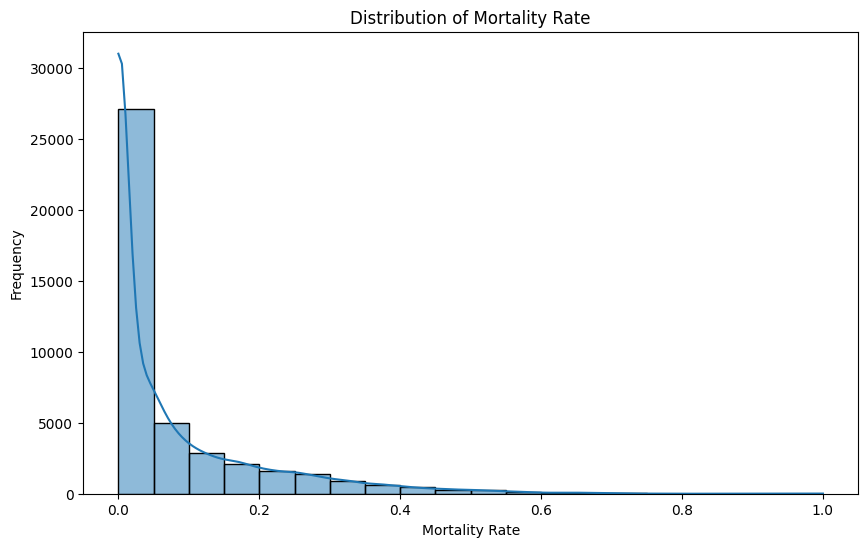

Summary statistics for Mortality Rate:
count    42871.000000
mean         0.074059
std          0.118299
min          0.000000
25%          0.000000
50%          0.016500
75%          0.100000
max          1.000000
Name: Mortality Rate, dtype: float64


In [ ]:
# Mortality Rate (Numerical)
# Plot the distribution of mortality rates using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Mortality Rate'], bins=20, kde=True)
plt.title('Distribution of Mortality Rate')
plt.xlabel('Mortality Rate')
plt.ylabel('Frequency')
plt.show()

# Calculate and display summary statistics for mortality rate
print("Summary statistics for Mortality Rate:")
print(df_cleaned['Mortality Rate'].describe())

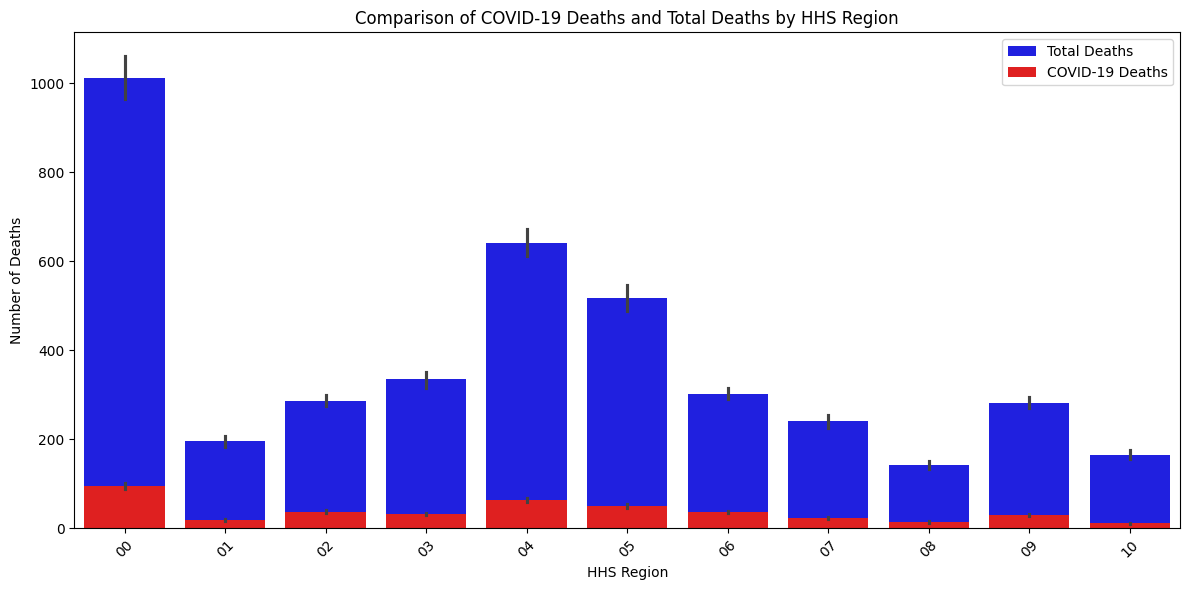

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot stacked bar chart for COVID-19 deaths and total deaths
sns.barplot(x='HHS Region', y='Total Deaths', data=df_cleaned, color='blue', label='Total Deaths')
sns.barplot(x='HHS Region', y='COVID-19 Deaths', data=df_cleaned, color='red', label='COVID-19 Deaths')

# Add legend and labels
plt.title('Comparison of COVID-19 Deaths and Total Deaths by HHS Region')
plt.xlabel('HHS Region')
plt.ylabel('Number of Deaths')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


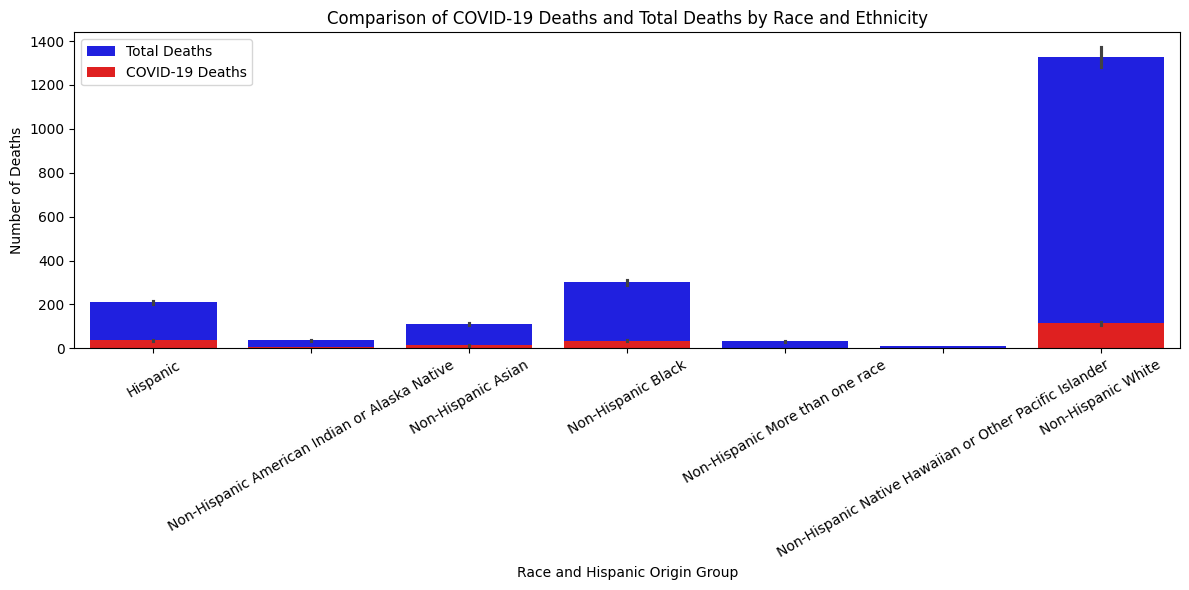

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Plot stacked bar chart for COVID-19 deaths and total deaths by Race and Hispanic Origin Group
sns.barplot(x='Race and Hispanic Origin Group', y='Total Deaths', data=df_cleaned, color='blue', label='Total Deaths')
sns.barplot(x='Race and Hispanic Origin Group', y='COVID-19 Deaths', data=df_cleaned, color='red', label='COVID-19 Deaths')

# Add legend and labels
plt.title('Comparison of COVID-19 Deaths and Total Deaths by Race and Ethnicity')
plt.xlabel('Race and Hispanic Origin Group')
plt.ylabel('Number of Deaths')
plt.legend()

plt.xticks(rotation = 30)
plt.tight_layout()
plt.show()


In [ ]:
pip install tabulate


In [ ]:
# Calculate COVID-19 deaths, total deaths, and mortality rate for each race and ethnicity group
stats_by_race = df_cleaned.groupby('Race and Hispanic Origin Group').agg({
    'COVID-19 Deaths': 'sum',
    'Total Deaths': 'sum',
    'Mortality Rate': 'mean'
})


from tabulate import tabulate

# Print the statistics for each race and ethnicity group
print("Race and Ethnicity Group\tCOVID-19 Deaths\tTotal Deaths\tMortality Rate")
print(tabulate(stats_by_race, headers='keys', tablefmt='pretty'))



Race and Ethnicity Group	COVID-19 Deaths	Total Deaths	Mortality Rate
+--------------------------------------------------------+-----------------+--------------+---------------------+
|             Race and Hispanic Origin Group             | COVID-19 Deaths | Total Deaths |   Mortality Rate    |
+--------------------------------------------------------+-----------------+--------------+---------------------+
|                        Hispanic                        |    331200.0     |  1919439.0   | 0.1046626239511823  |
|     Non-Hispanic American Indian or Alaska Native      |     15730.0     |   115016.0   | 0.07986508744038157 |
|                   Non-Hispanic Asian                   |     58398.0     |   497544.0   | 0.07576605239786856 |
|                   Non-Hispanic Black                   |    295779.0     |  2633422.0   | 0.0700008658008658  |
|            Non-Hispanic More than one race             |     4629.0      |   71931.0    | 0.0416314630988347  |
| Non-Hispanic Nati

- Interestingly, Non-Hispanic American Indian or Alaska Native individuals have the highest mortality rate (0.0799), indicating a relatively higher risk of mortality among this group compared to others.

- Non-Hispanic White individuals have the highest total number of deaths (17,444,532), which is expected given that they are the largest racial group in the dataset.

- Hispanic individuals have the highest number of COVID-19 deaths (331,200), followed by Non-Hispanic White individuals (1,504,455).


In [ ]:
# Calculate COVID-19 deaths, total deaths, mortality rate, and sample count for each race and ethnicity group
stats_by_race = df_cleaned.groupby('Race and Hispanic Origin Group').agg({
    'COVID-19 Deaths': 'sum',
    'Total Deaths': 'sum',
    'Mortality Rate': 'mean',
    'Age Group': 'count',  # Count the number of samples for each group
    'Age Group': lambda x: x.mode().iloc[0],  # Get the mode (most common) age group for each group
    'HHS Region': lambda x: x.mode().iloc[0]  # Get the mode (most common) HHS region for each group
})

# Rename the 'Age Group' column to 'Most Common Age Group' and 'HHS Region' column to 'Most Common HHS Region'
stats_by_race.rename(columns={'Age Group': 'Most Common Age Group', 'HHS Region': 'Most Common HHS Region'}, inplace=True)

# Print the table
print(tabulate(stats_by_race, headers='keys', tablefmt='grid'))


+--------------------------------------------------------+-------------------+----------------+------------------+-------------------------+--------------------------+
| Race and Hispanic Origin Group                         |   COVID-19 Deaths |   Total Deaths |   Mortality Rate | Most Common Age Group   |   Most Common HHS Region |
+========================================================+===================+================+==================+=========================+==========================+
| Hispanic                                               |            331200 |        1919439 |        0.104663  | 50-64                   |                       00 |
+--------------------------------------------------------+-------------------+----------------+------------------+-------------------------+--------------------------+
| Non-Hispanic American Indian or Alaska Native          |             15730 |         115016 |        0.0798651 | 50-64                   |                    

In [ ]:
total_covid_deaths = df_cleaned['COVID-19 Deaths'].sum()
print("Total COVID-19 Deaths:", total_covid_deaths)


Total COVID-19 Deaths: 2212676


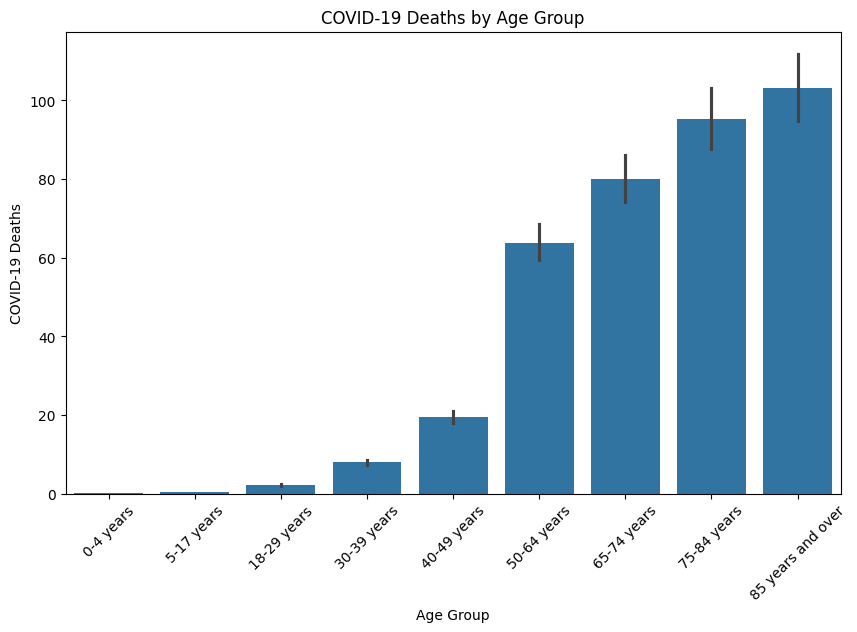

In [ ]:
# Bar chart for COVID-19 deaths by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='COVID-19 Deaths', data=df_cleaned)
plt.title('COVID-19 Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Deaths')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Count of COVID-19 deaths by Age Group
age_group_counts = df_cleaned['Age Group'].value_counts()

# Print Age Group and Count of COVID-19 Deaths
print("Age Group\tCount of COVID-19 Deaths")
for age_group, count in age_group_counts.items():
    print(f"{age_group}\t\t{count}")


Age Group	Count of COVID-19 Deaths
65-74 years		6238
75-84 years		6166
50-64 years		6146
85 years and over		5943
40-49 years		4137
18-29 years		4106
30-39 years		3874
0-4 years		3803
5-17 years		2458


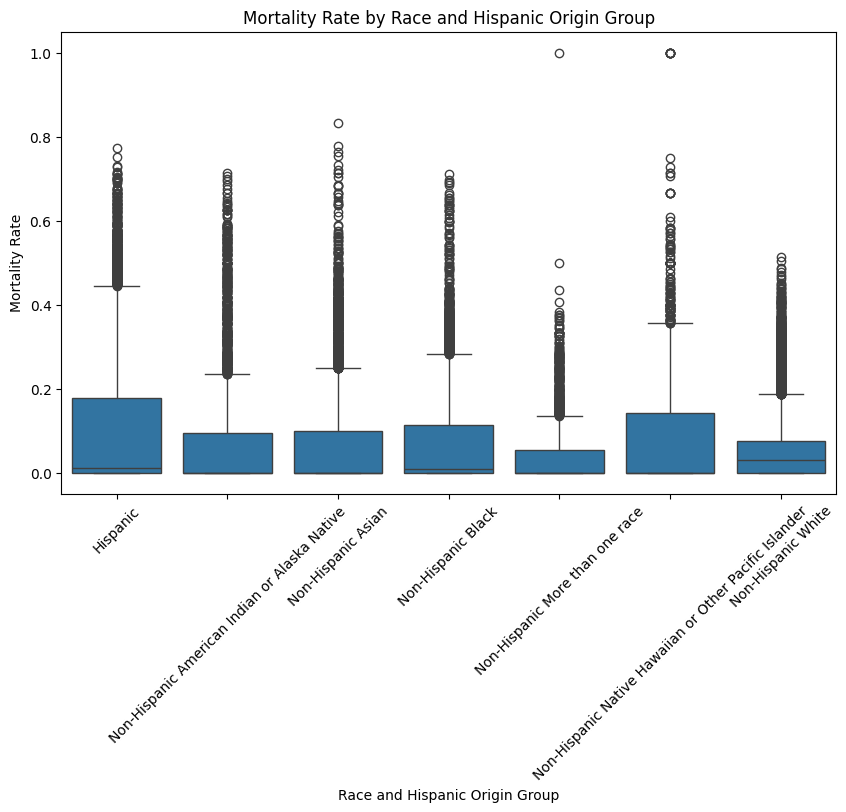

In [ ]:
# Boxplot for Mortality Rate by Race and Hispanic Origin Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Race and Hispanic Origin Group', y='Mortality Rate', data=df_cleaned)
plt.title('Mortality Rate by Race and Hispanic Origin Group')
plt.xlabel('Race and Hispanic Origin Group')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45)
plt.show()


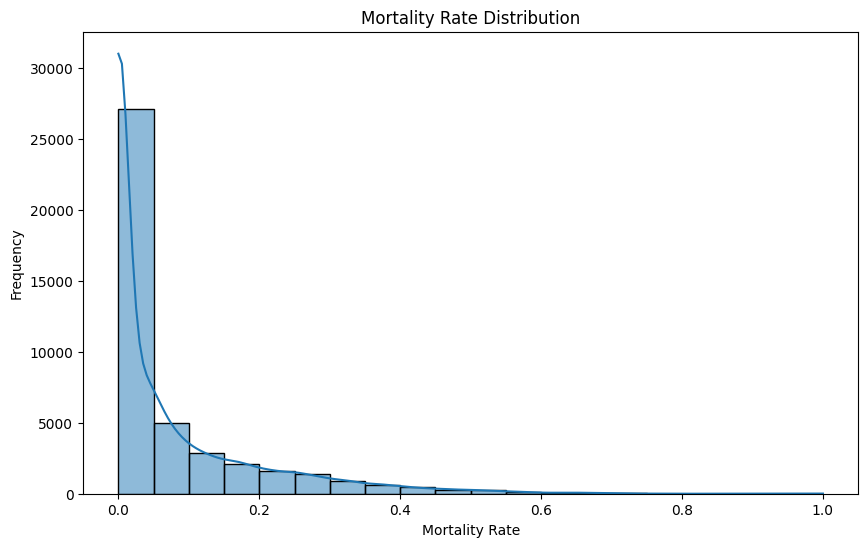

In [ ]:
# Histogram for Mortality Rate Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Mortality Rate'], bins=20, kde=True)
plt.title('Mortality Rate Distribution')
plt.xlabel('Mortality Rate')
plt.ylabel('Frequency')
plt.show()

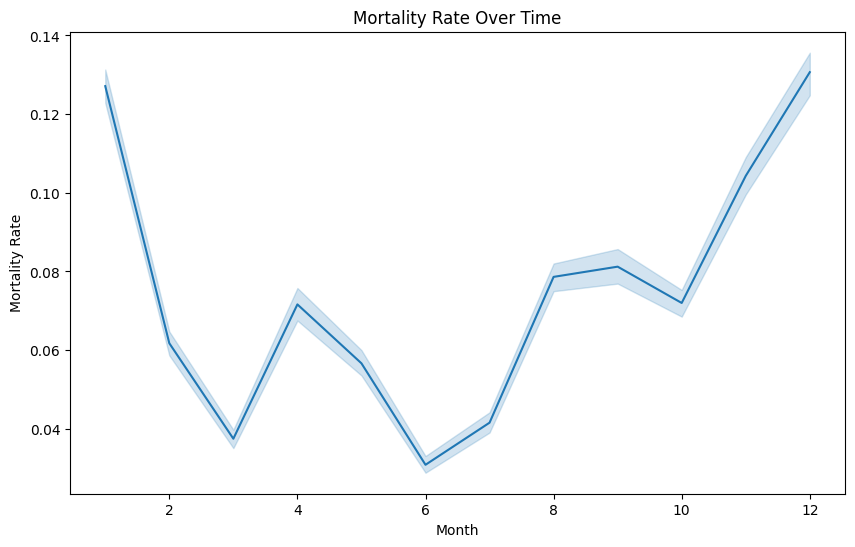

In [ ]:
# Line plot for Mortality Rate Over Time (Month)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Mortality Rate', data=df_cleaned)
plt.title('Mortality Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Mortality Rate')
plt.show()

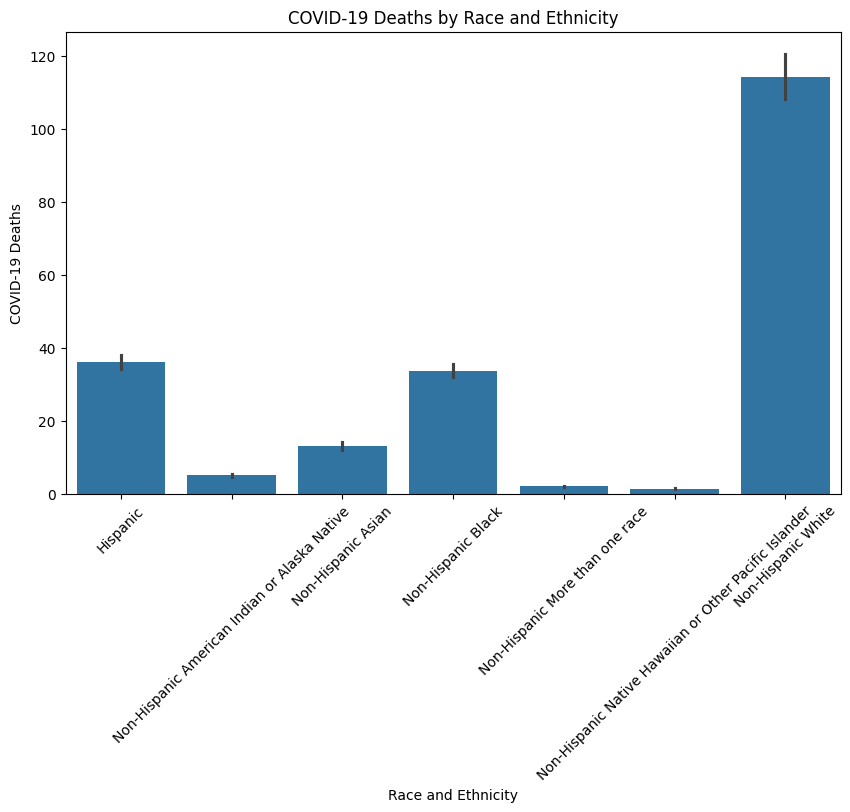

In [ ]:
# Bar plot for COVID-19 deaths by Race and Ethnicity
plt.figure(figsize=(10, 6))
sns.barplot(x='Race and Hispanic Origin Group', y='COVID-19 Deaths', data=df_cleaned)
plt.title('COVID-19 Deaths by Race and Ethnicity')
plt.xlabel('Race and Ethnicity')
plt.ylabel('COVID-19 Deaths')
plt.xticks(rotation=45)
plt.show()



# Separate input and output features

In [ ]:

from sklearn.model_selection import train_test_split

X = df.drop(columns=['COVID-19 Deaths', 'Total Deaths'])
y = df['COVID-19 Deaths']  # Assuming 'COVID-19 Deaths' is the target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group
132917,2023-09-27,2021-09-26,2021-10-02,By Week,2021,9.0,39.0,2021-10-02,09,Hispanic,50-64 years
35318,2023-09-27,2021-11-28,2021-12-04,By Week,2021,11.0,48.0,2021-12-04,02,Non-Hispanic More than one race,18-29 years
15343,2023-09-27,2020-05-03,2020-05-09,By Week,2020,5.0,19.0,2020-05-09,01,Hispanic,75-84 years
145477,2023-09-27,2021-05-02,2021-05-08,By Week,2021,5.0,18.0,2021-05-08,10,Non-Hispanic More than one race,5-17 years
136684,2023-09-27,2022-09-25,2022-10-01,By Week,2022,9.0,39.0,2022-10-01,09,Non-Hispanic Black,5-17 years
...,...,...,...,...,...,...,...,...,...,...,...
70297,2023-09-27,2020-01-05,2020-01-11,By Week,2020,1.0,2.0,2020-01-11,5,Non-Hispanic Asian,75-84 years
7156,2023-09-27,2021-11-21,2021-11-27,By Week,2021,11.0,47.0,2021-11-27,United States,Non-Hispanic Black,5-17 years
116371,2023-09-27,2021-01-24,2021-01-30,By Week,2021,1.0,4.0,2021-01-30,8,Non-Hispanic Asian,5-17 years
977,2023-09-27,2020-03-29,2020-04-04,By Week,2020,3.0,14.0,2020-04-04,United States,Non-Hispanic More than one race,50-64 years


In [ ]:
y_train

132917    150.0
35318       0.0
15343      32.0
145477      0.0
136684      0.0
          ...  
70297       0.0
7156        1.0
116371      0.0
977        12.0
21844       0.0
Name: COVID-19 Deaths, Length: 53676, dtype: float64

In [ ]:
X_test

,Data As Of,Start Date,End Date,Group,Year,Month,MMWR Week,Week-Ending Date,HHS Region,Race and Hispanic Origin Group,Age Group
57200,2023-09-27,2020-04-05,2020-04-11,By Week,2020,4.0,15.0,2020-04-11,04,Non-Hispanic Black,50-64 years
131047,2023-09-27,2021-03-28,2021-04-03,By Week,2021,3.0,13.0,2021-04-03,9,Hispanic,75-84 years
120283,2023-09-27,2022-02-06,2022-02-12,By Week,2022,2.0,6.0,2022-02-12,8,Non-Hispanic More than one race,75-84 years
85411,2023-09-27,2020-04-19,2020-04-25,By Week,2020,4.0,17.0,2020-04-25,6,Non-Hispanic Asian,5-17 years
45053,2023-09-27,2020-10-04,2020-10-10,By Week,2020,10.0,41.0,2020-10-10,03,Non-Hispanic Native Hawaiian or Other Pacific ...,85 years and over
...,...,...,...,...,...,...,...,...,...,...,...
19919,2023-09-27,2021-07-18,2021-07-24,By Week,2021,7.0,29.0,2021-07-24,01,Non-Hispanic Native Hawaiian or Other Pacific ...,18-29 years
78940,2023-09-27,2022-04-24,2022-04-30,By Week,2022,4.0,17.0,2022-04-30,5,Non-Hispanic Black,5-17 years
17558,2023-09-27,2020-11-29,2020-12-05,By Week,2020,11.0,49.0,2020-12-05,01,Non-Hispanic White,85 years and over
27248,2023-09-27,2023-07-02,2023-07-08,By Week,2023,7.0,27.0,2023-07-08,01,Non-Hispanic Black,50-64 years


In [ ]:
y_test

57200      81.0
131047     26.0
120283      0.0
85411       0.0
45053       0.0
          ...  
19919       0.0
78940       0.0
17558     267.0
27248       0.0
53986       0.0
Name: COVID-19 Deaths, Length: 13419, dtype: float64